In [47]:
import healpy
import chealpix as chp
import numpy as np

In [4]:
data = np.load("../../alvis_mount/100_of_upper_hp.npy.npy")

In [5]:
data.shape

(1, 5, 13, 49152)

In [48]:
nside = 8
ring_idcs = np.arange(12 * nside**2)
# [0, 1, 2, 3, ...]
shifted_ring_idcs = np.roll(ring_idcs, -2)
# [2, 3, ..., 0, 1]
shifted_ring_idcs_in_nest = chp.ring2nest(nside, shifted_ring_idcs)
# [2_n, 3_n, ...,0_n, 1_n]

# so far, this would return the image in ring indices, convert back to nested:
nest_idcs = np.arange(12*nside**2)
# chp.nest2ring()
# nest_idcs_in_ring = hp.nest2ring(self.nside, nest_idcs)
nest_idcs_in_ring = chp.nest2ring(nside, nest_idcs)
result = shifted_ring_idcs_in_nest[nest_idcs_in_ring]


In [49]:
x = np.array([[i]*4 for i in range(12*8**2//4)]).flatten()

In [50]:
shifted_idx = healpy.ring2nest(4, np.roll(healpy.nest2ring(4, np.array(range(12*4**2))), 2))

In [51]:
x_shifted = x[result]

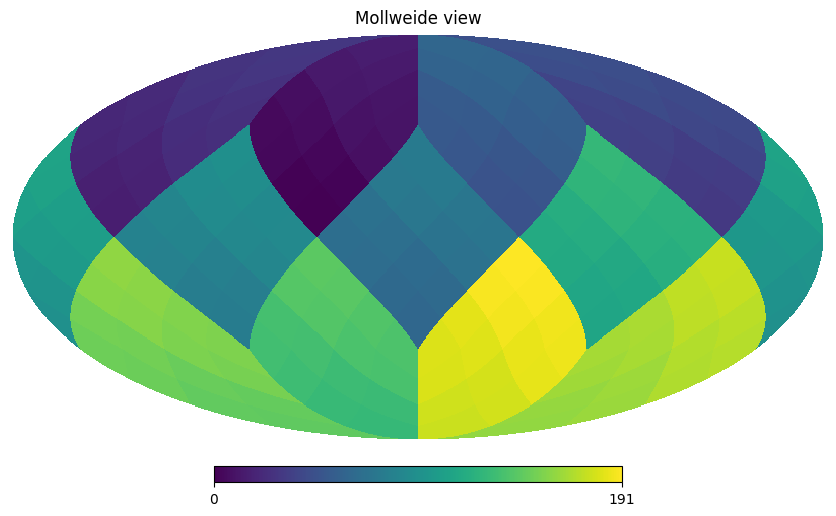

In [52]:
healpy.mollview(x, nest=True)

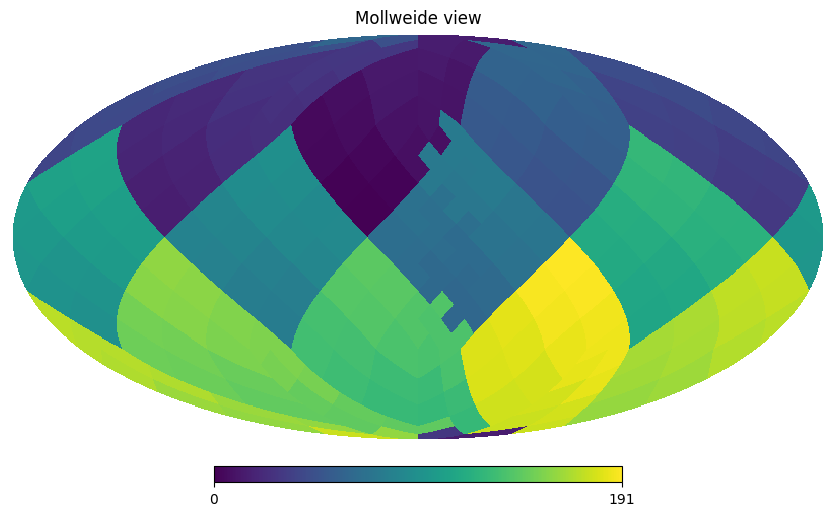

In [53]:
healpy.mollview(x_shifted, nest=True)

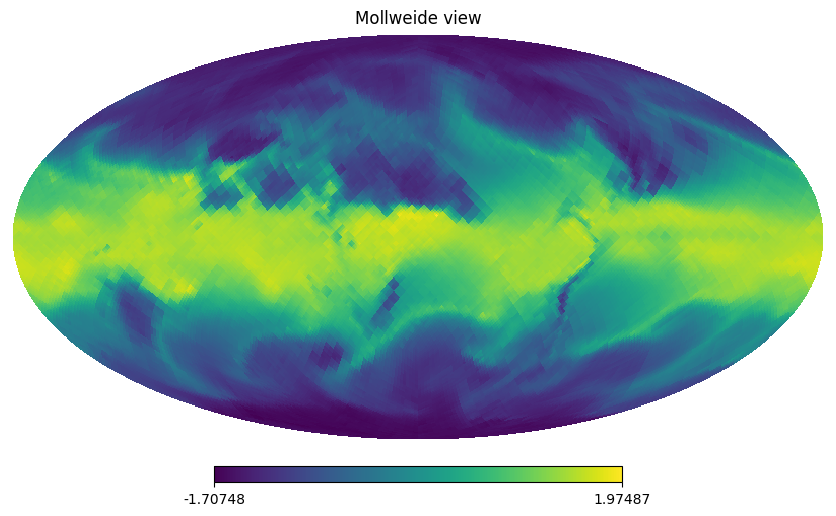

In [6]:
healpy.mollview(data[0, 1, 1, :], nest=True)

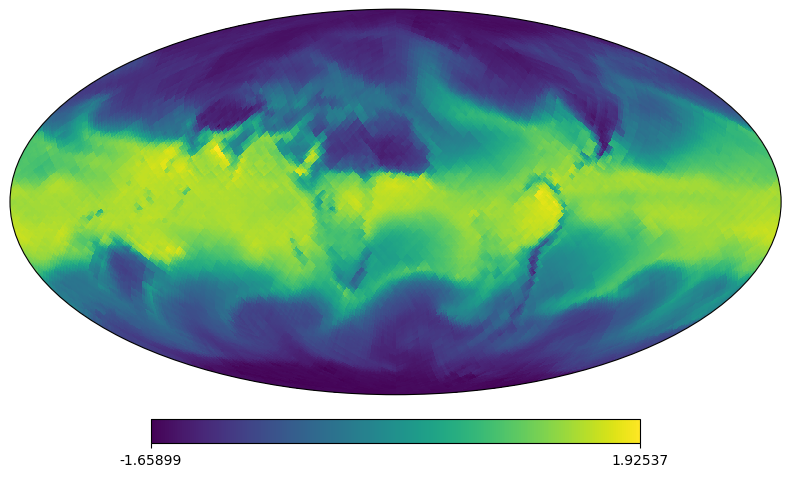

In [31]:
healpy.projview(data[0, 1, 0, :], projection_type="mollweide", nest=True)
healpy.newprojplot(

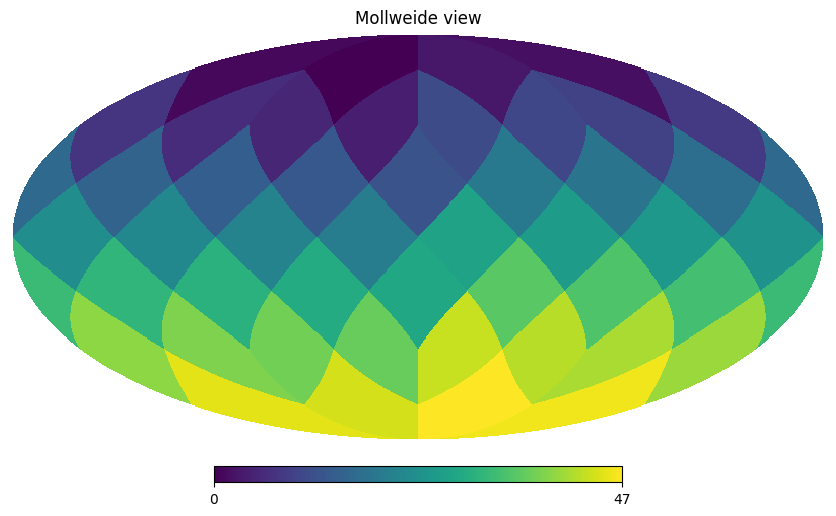

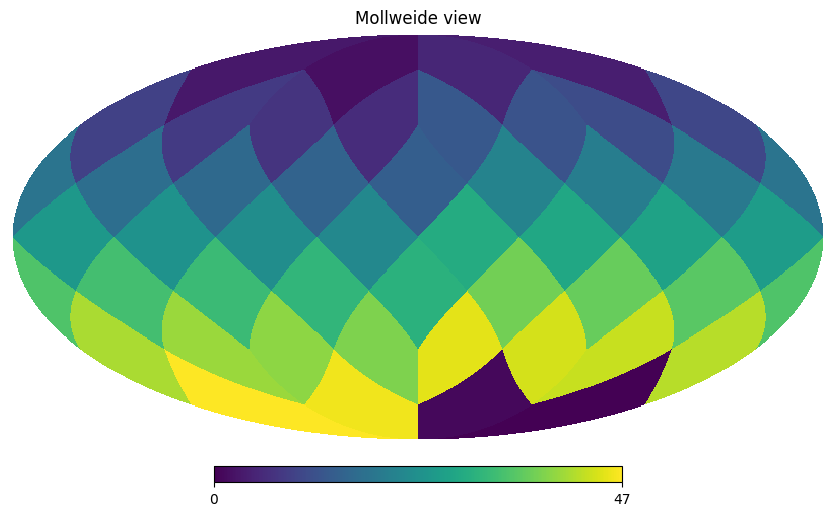

In [59]:
x = np.array(range(12*2**2))
x_shifted = np.roll(x, -2)
healpy.mollview(x, nest=False)
healpy.mollview(x_shifted, nest=False)